In [2]:
# Standard libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import sys

# Add src folder to path
sys.path.append("../src")

# Import functions from src
from preprocess import load_image
from model import processor, model

# Paths
DATA_DIR = "../data"
OUTPUT_DIR = "../outputs/results"
CAPTIONS_FILE = "../outputs/captions.txt"

# Create output folder if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [3]:
images = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Found images:", images)


Found images: ['sample2.jpg', 'sample1.jpg', 'sample3.jpg']


In [4]:
def generate_caption(image):
    inputs = processor(image, return_tensors="pt")
    outputs = model.generate(
        **inputs,
        max_length=30,   # longer captions
        num_beams=5,     # beam search
        early_stopping=True
    )
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption


Generating captions:   0%|                                                                                    | 0/3 [00:00<?, ?it/s]

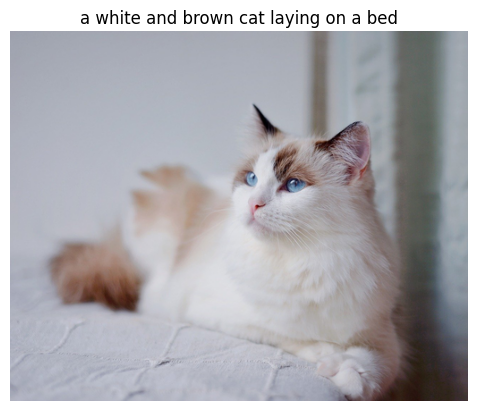

Generating captions:  33%|█████████████████████████▎                                                  | 1/3 [00:02<00:04,  2.24s/it]

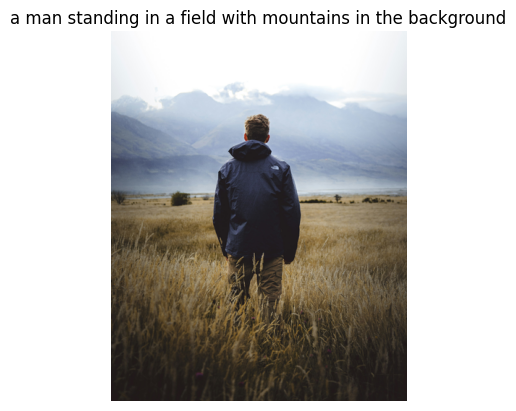

Generating captions:  67%|██████████████████████████████████████████████████▋                         | 2/3 [00:04<00:02,  2.21s/it]

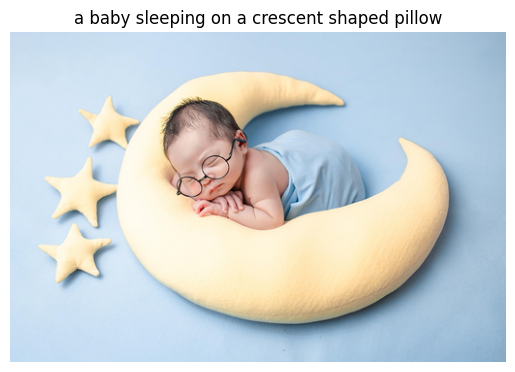

Generating captions: 100%|████████████████████████████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.05s/it]


In [5]:
captions = []

for img_file in tqdm(images, desc="Generating captions"):
    img_path = os.path.join(DATA_DIR, img_file)
    image = load_image(img_path)

    # Generate caption
    caption = generate_caption(image)
    captions.append((img_file, caption))

    # Show the image + caption in notebook
    plt.imshow(image)
    plt.axis('off')
    plt.title(caption)
    plt.show()


In [7]:
with open(CAPTIONS_FILE, "w") as f:
    for img_file, caption in captions:
        f.write(f"{img_file}: {caption}\n")

print("✅ Captions saved to", CAPTIONS_FILE)


✅ Captions saved to ../outputs/captions.txt
